# California house price prediction

Since the boston house price prediction dataset has been removed from sklearn due to to ethical reasons, I chose a similair dataset which will display the practical skills of employing a linear regression model.

# Data exploration

The dataset is available on [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download). The data pertains to the houses found in a given california district and some summary stats abouth them based on the 1990 census data. Some of the data is not cleaned so (warning of the data provising author)


the features in this data include:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
data = pd.read_csv('california_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The total_bedrooms seem to miss around ~200 values.  To clean this dataset we can do a guess of what the value of these houses by using the modus/average or mean of the total bedrooms found in the data set. I do however think this may not be the best approach since bedrooms may be a strong indicator of the house mean price. Since we already have a lot of entries we can simply drop these tables.

In [268]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


now we can split the data into a test group and training group for the eventual model we will create.

In [269]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [271]:
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3546,-118.62,34.26,15.0,10860.0,1653.0,4178.0,1581.0,6.3249,<1H OCEAN,262100.0
19787,-122.95,40.67,17.0,1498.0,331.0,574.0,242.0,2.0268,INLAND,94200.0
8086,-118.20,33.81,46.0,1388.0,254.0,742.0,241.0,4.6458,NEAR OCEAN,212100.0
6398,-118.04,34.15,34.0,1523.0,311.0,676.0,295.0,3.3621,INLAND,377200.0
9359,-122.52,37.95,33.0,4448.0,631.0,1675.0,628.0,7.8904,NEAR BAY,468800.0


To better understand if there are possible correlations within the features and the house median value we can start by plotting each feature.

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

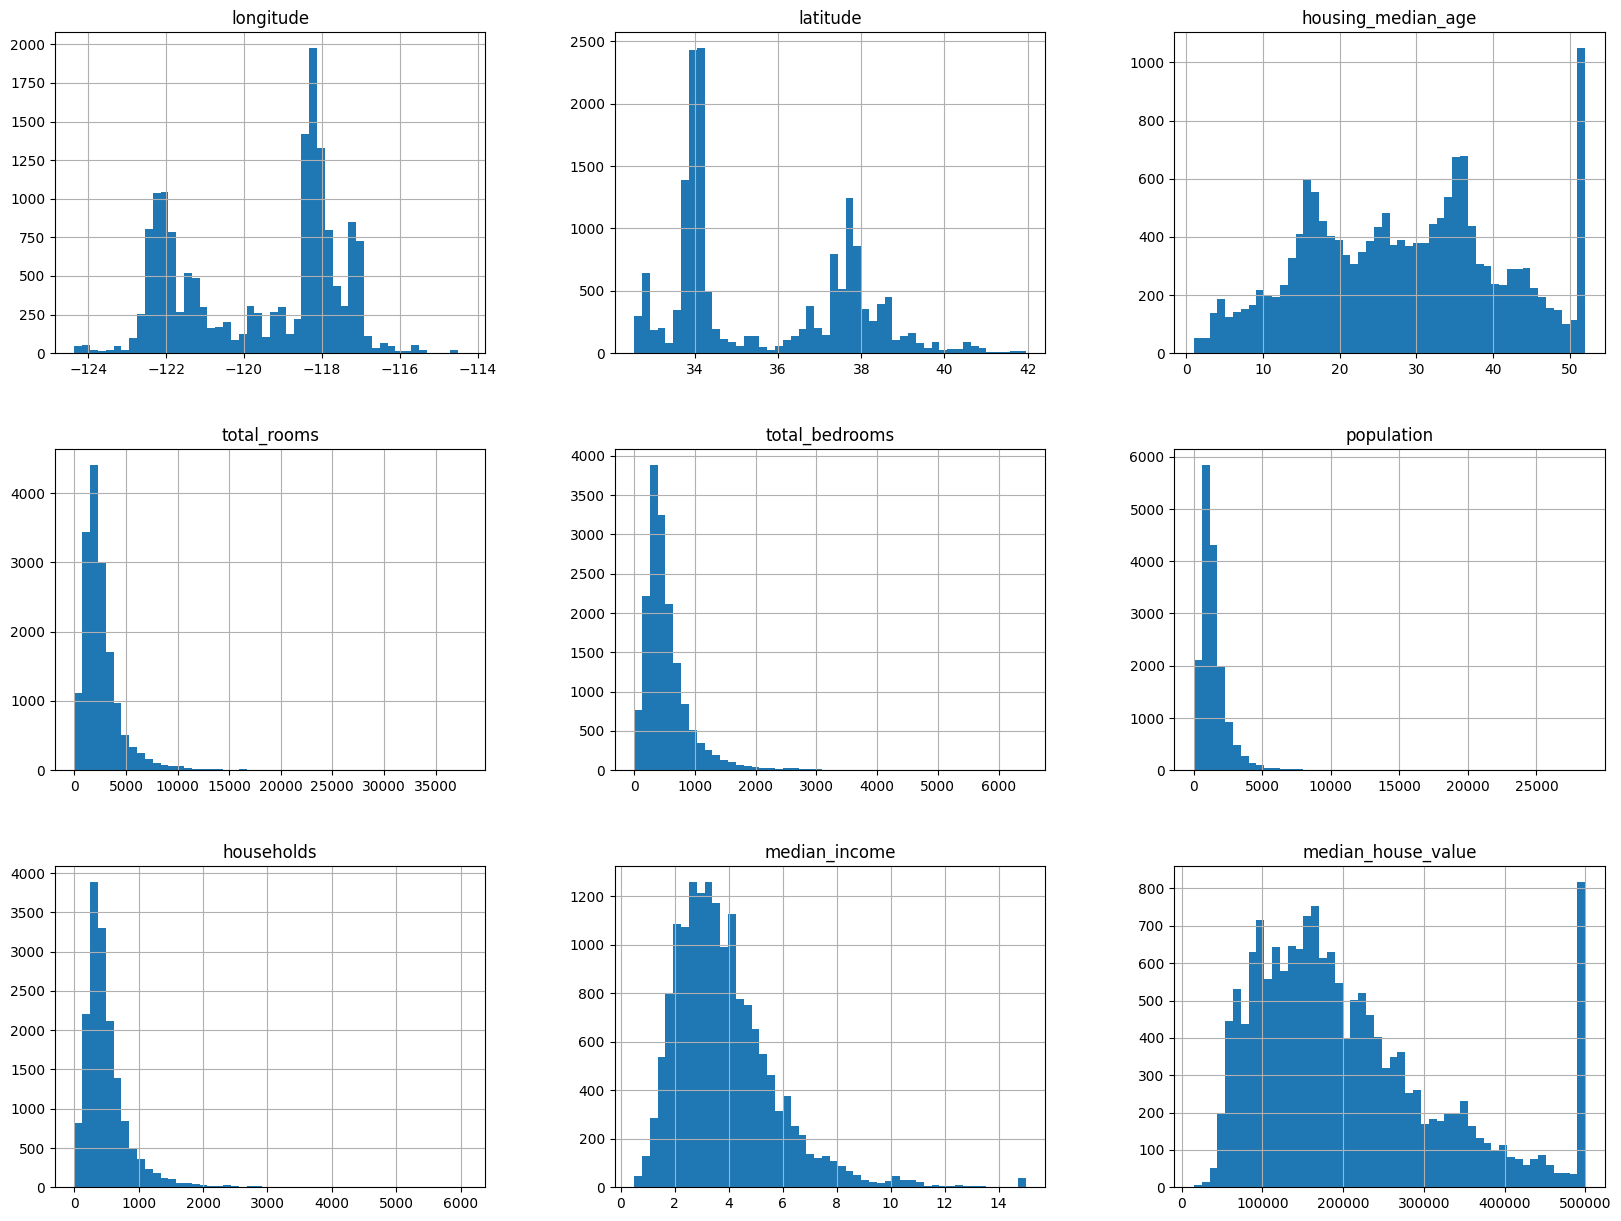

In [272]:
train_data.hist(bins=50, figsize=(20, 15))

C:\Users\Kerimcan\AppData\Local\Temp\ipykernel_22452\3119725513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<AxesSubplot: >

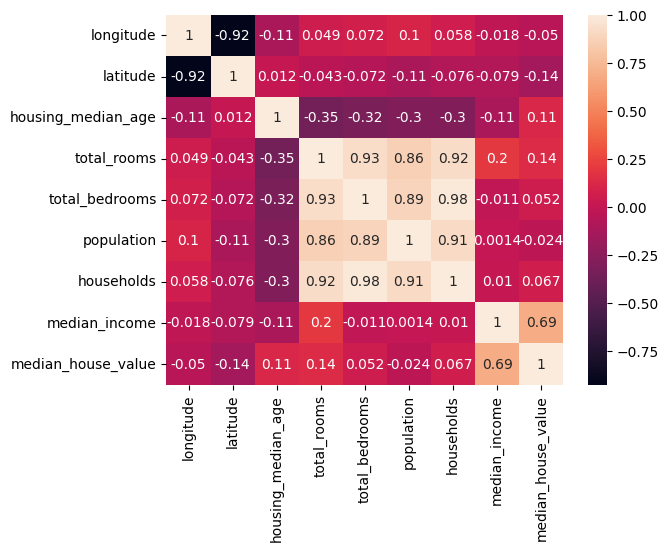

In [273]:
sns.heatmap(train_data.corr(), annot=True)

When plotting this heatmap , I also gained insight on a feature which is a non-numerical which we have to adapt for it be plotted and perhaps further used in the modelling.

in this heatmap we can find certain values which have a corellation with the median_house_value feature. We can simply see this by reading through, in this case the boxes at the bottom. We must use features which have a high correlation with this feature which means a lighter color.

from this we can conclude that the strongest indicator for the house price, would be the median income followed by the total rooms, and then by the housing age.

# Data processing

In [274]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1) 
train_data['population'] = np.log(train_data['population']+1) 
train_data['households'] = np.log(train_data['households']+1) 

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

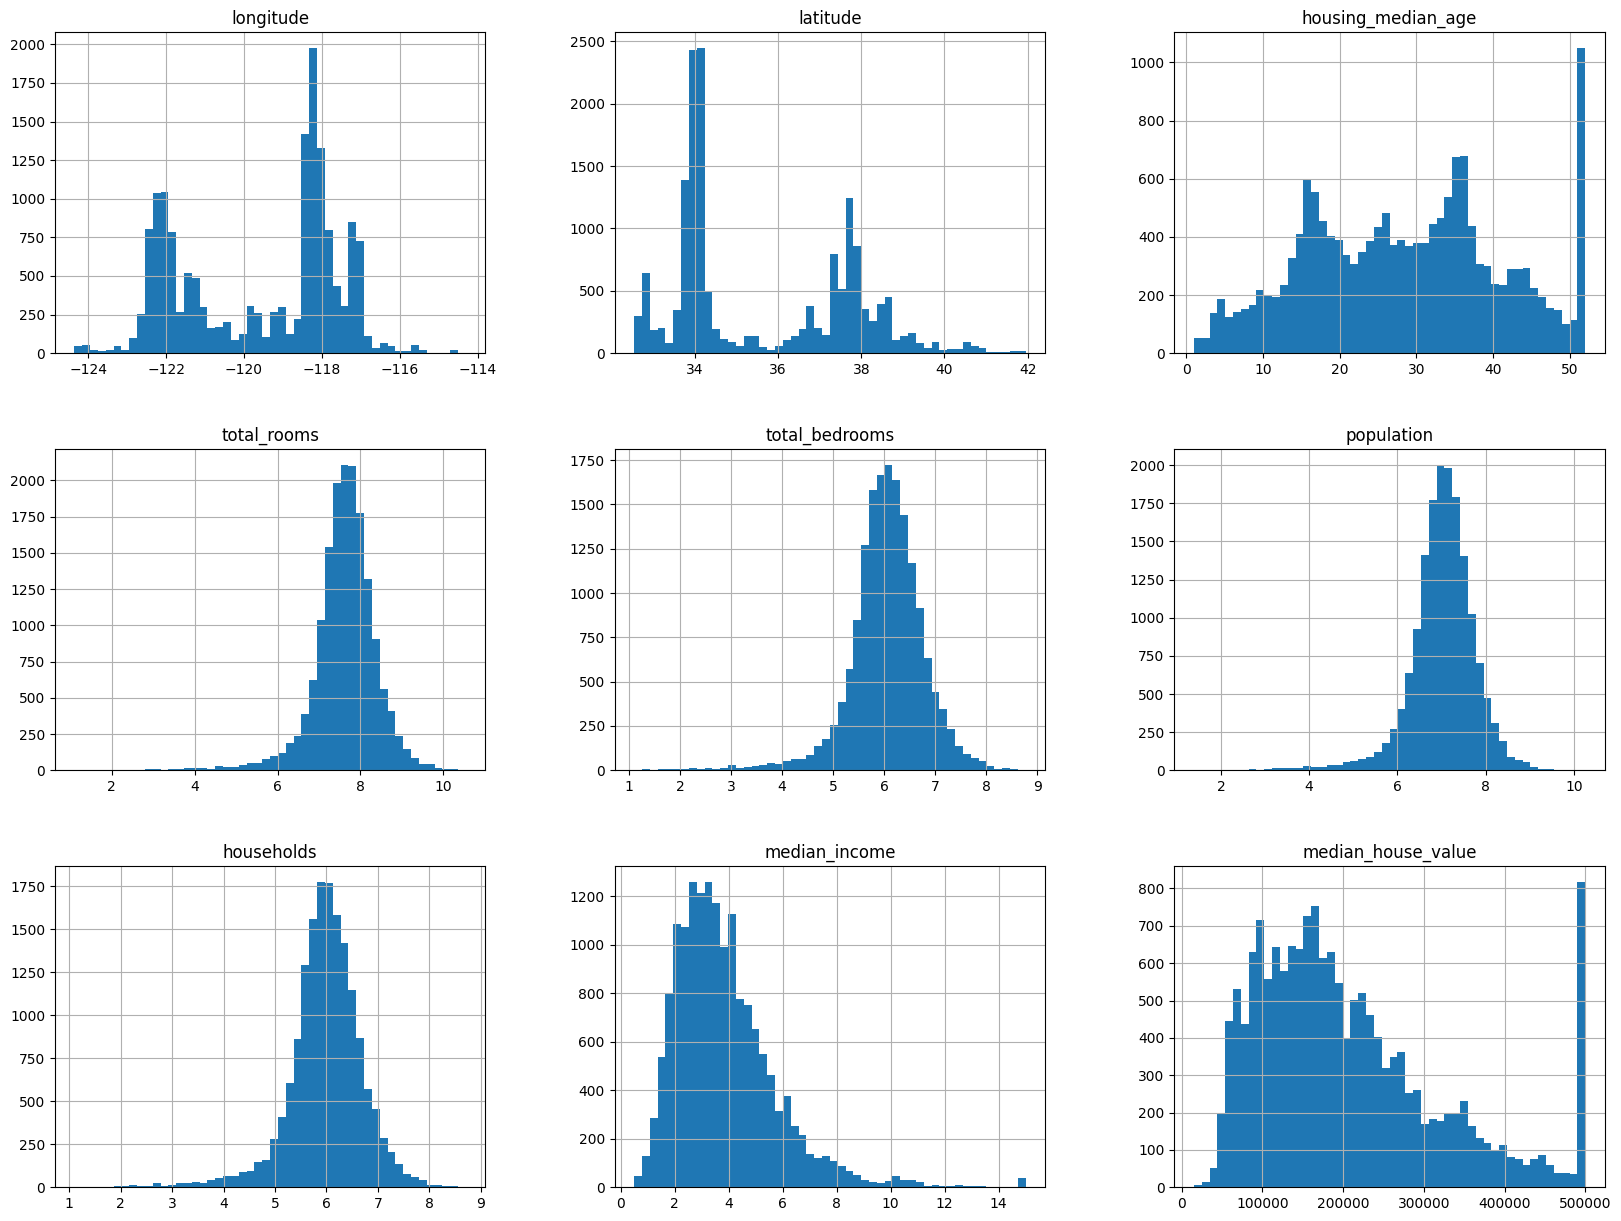

In [275]:
train_data.hist(bins=50, figsize=(20, 15))

house being closer to the ocean is a desirable trait which might impact the house price positivaly. since the ocean proximaty is not a numerical we can use get_dummies function to convert it to x amount of classes.

In [276]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [277]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3546,-118.62,34.26,15.0,9.292934,7.410952,8.337827,7.366445,6.3249,262100.0,1,0,0,0,0
19787,-122.95,40.67,17.0,7.312553,5.805135,6.354370,5.493061,2.0268,94200.0,0,1,0,0,0
8086,-118.20,33.81,46.0,7.236339,5.541264,6.610696,5.488938,4.6458,212100.0,0,0,0,0,1
6398,-118.04,34.15,34.0,7.329094,5.743003,6.517671,5.690359,3.3621,377200.0,0,1,0,0,0
9359,-122.52,37.95,33.0,8.400435,6.448889,7.424165,6.444131,7.8904,468800.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16089,-122.48,37.71,43.0,8.256088,6.926577,7.311886,6.721426,3.5296,400000.0,0,0,0,0,1
12402,-116.26,33.72,10.0,9.148997,7.510978,8.073715,7.157735,3.1086,105800.0,0,1,0,0,0
8348,-118.32,33.94,36.0,7.050989,5.416100,6.461468,5.424950,4.0000,192000.0,1,0,0,0,0
17543,-121.88,37.35,52.0,7.441320,6.037871,7.198184,6.021023,2.8167,183500.0,1,0,0,0,0


<AxesSubplot: >

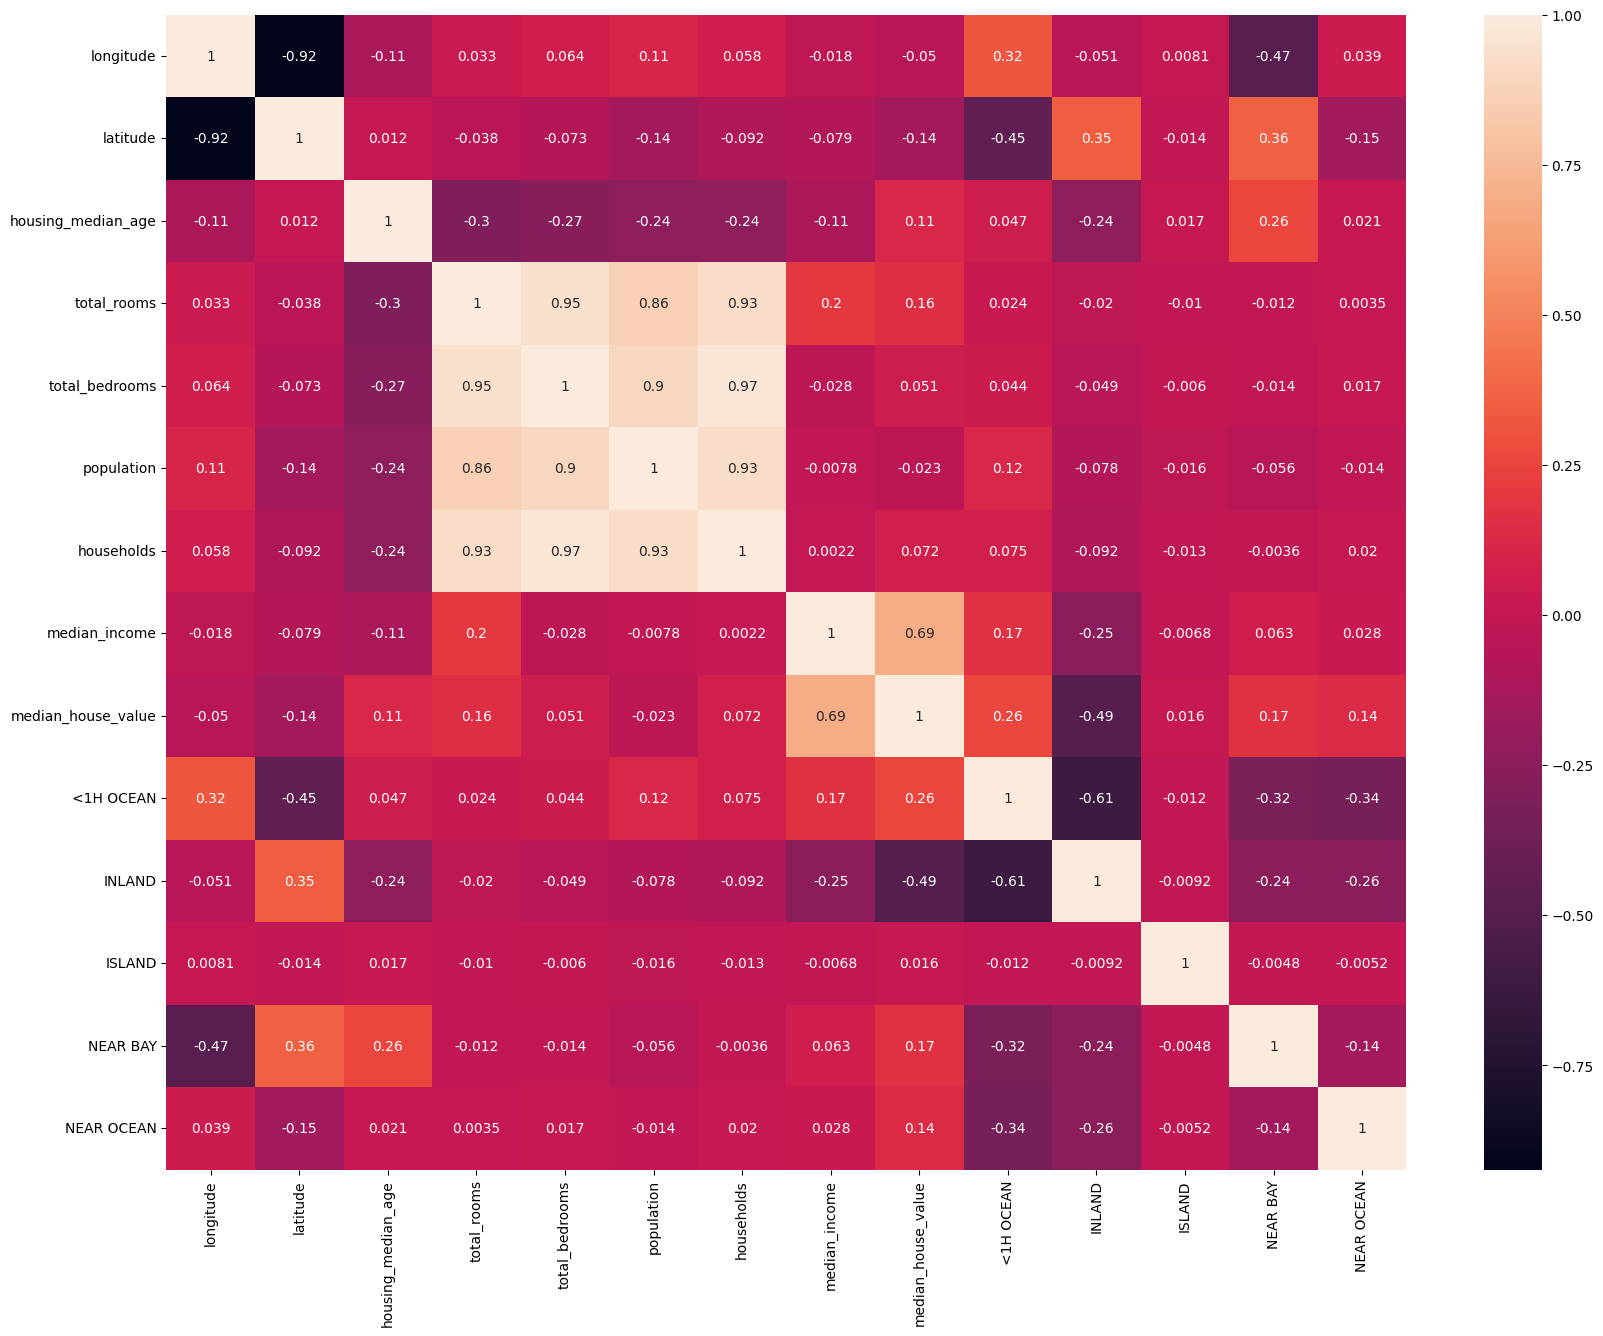

In [278]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot=True)

INLAND feature has a negative correlation with the median house value (cheaper), it is the opposite for <1H ocean (more expensive).

We can then plot the latitude with the longtitude to get a possible insight on the geographical positioning of the houses.

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

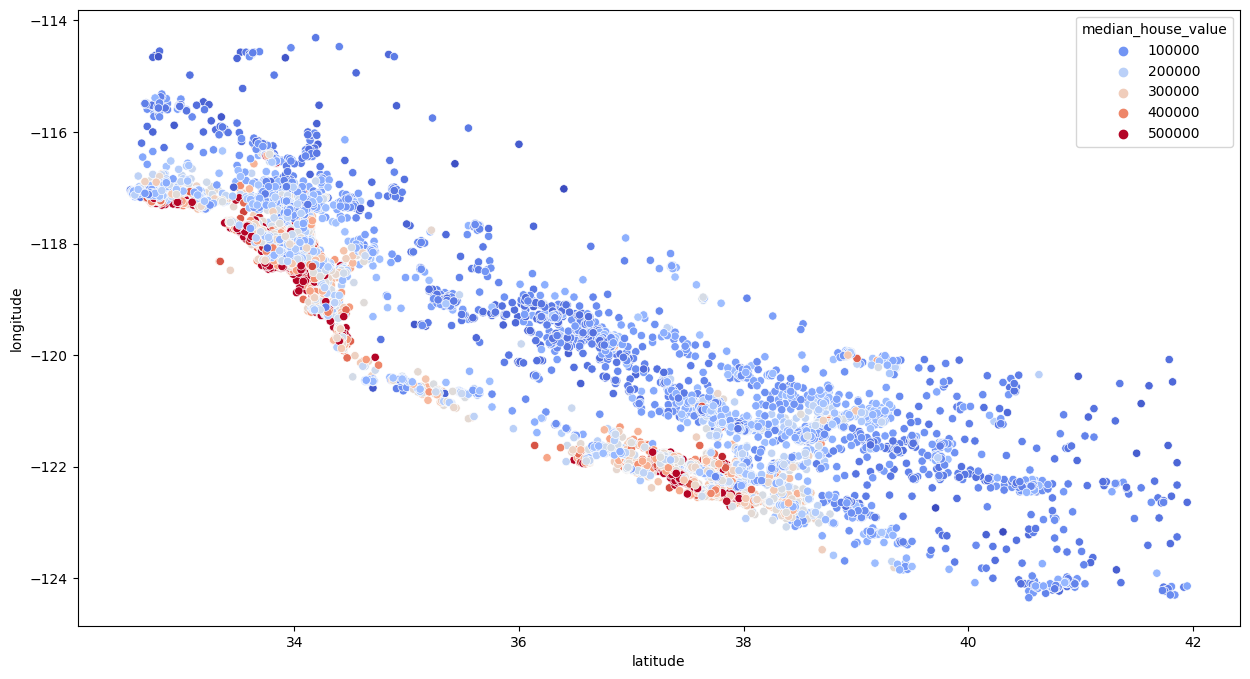

In [279]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

The more expensive houses which are marked in warm colors are closely aligned to the under part of the scatterplot. This is because it is closer to the ocean.

# Feature engineering

by manipulating the data features we can create new features that can possible be a relatively strong indicator to predict the house prices.

In [280]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_roms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot: >

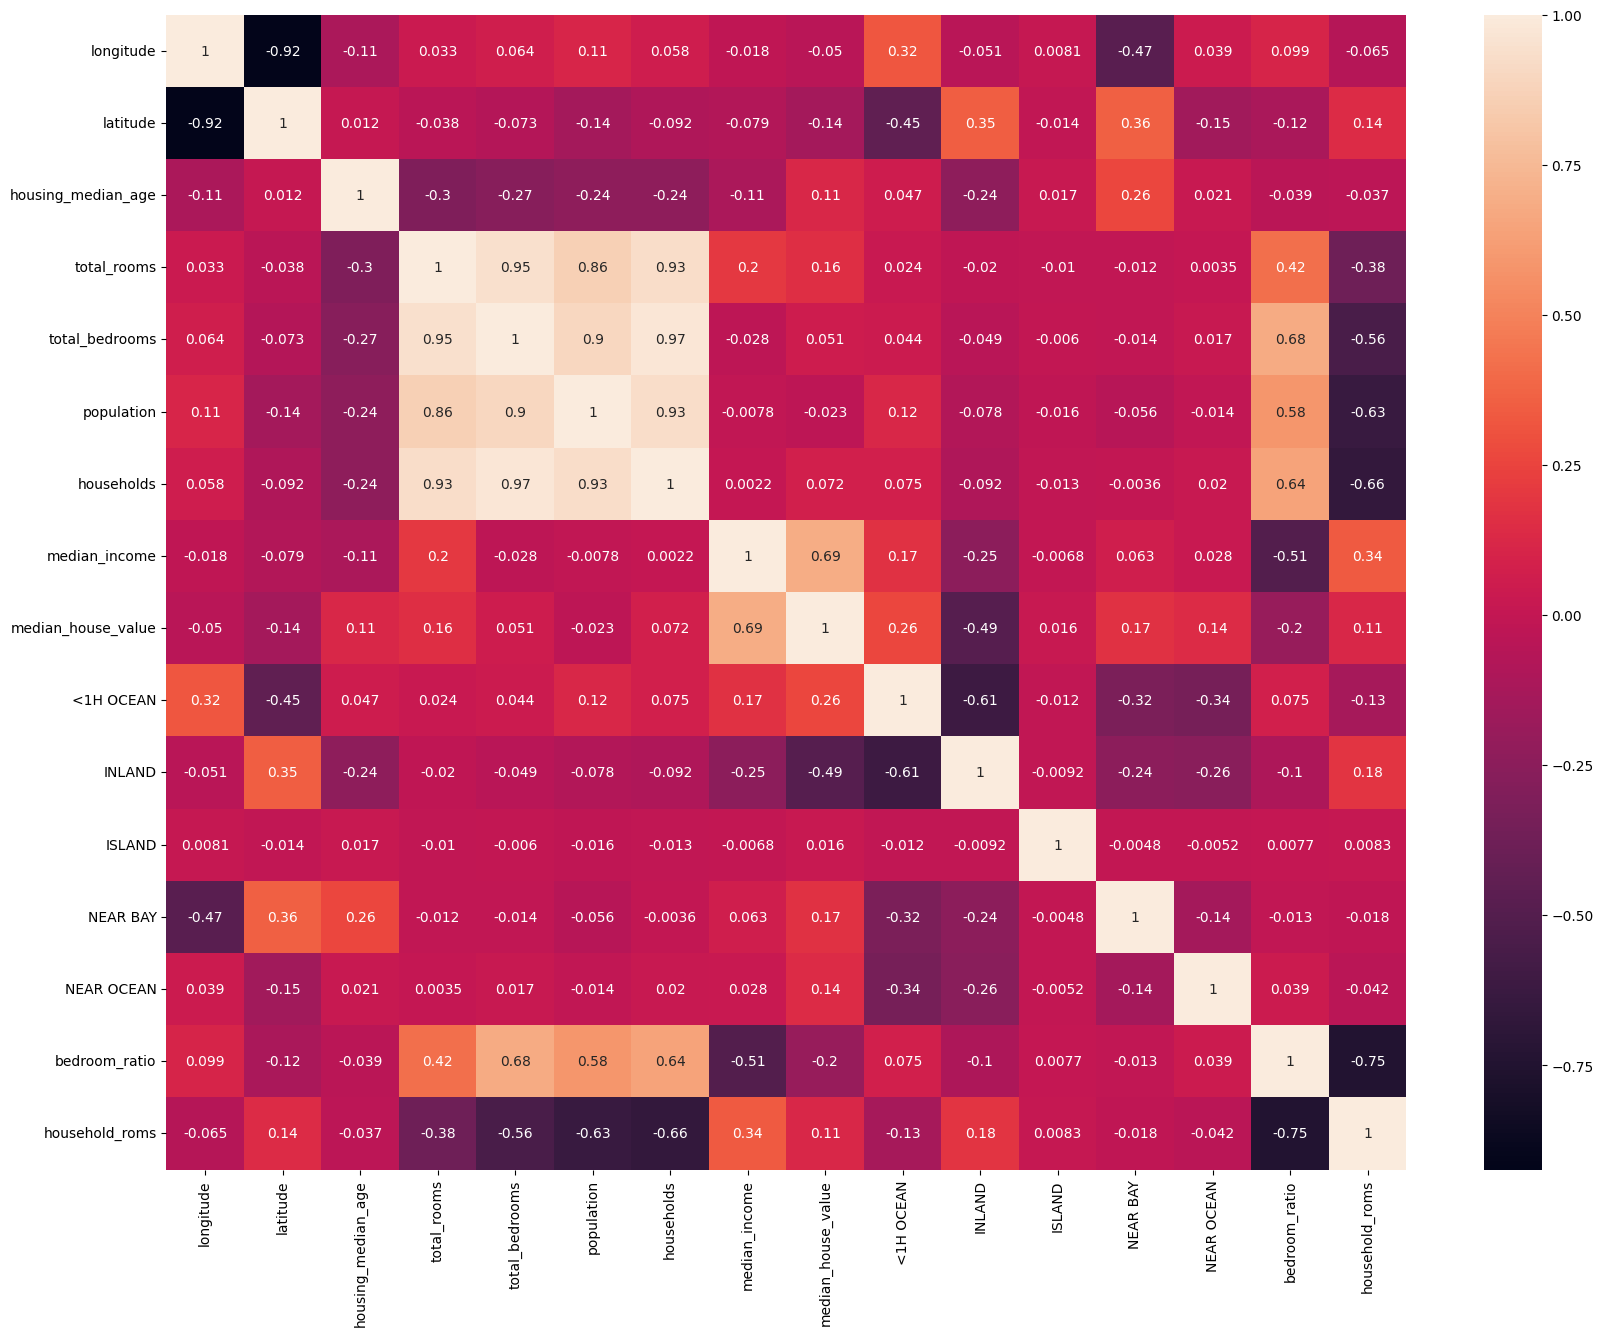

In [281]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot=True)

Bedroom ratio has a negative correlation with the house median value (cheaper) and the household rooms has a positive relation (more expensive).

# Feature selection & moddeling

In the [youtube tutorial](https://www.youtube.com/watch?v=Wqmtf9SA_kk) the moddeling uses all the features to predict the house price.

However when we look at the heatmap we can clearly see that some features are closer to 0 indicating no linear relation. Taking this into the model could be considered overfitting or adding irrelevant data into the model.

features found to have a strong relations are:

median_income
OCEAN PROXIMITY features

In [282]:
corr_matrix = train_data.corr()

corr_with_target = corr_matrix['median_house_value']

sorted_corr_with_target = corr_with_target.sort_values(ascending=False)
print(sorted_corr_with_target)

median_house_value    1.000000
median_income         0.688177
<1H OCEAN             0.260659
NEAR BAY              0.166295
total_rooms           0.157013
NEAR OCEAN            0.139016
housing_median_age    0.114497
household_roms        0.113471
households            0.071815
total_bedrooms        0.051427
ISLAND                0.016215
population           -0.022857
longitude            -0.049624
latitude             -0.141859
bedroom_ratio        -0.199923
INLAND               -0.490683
Name: median_house_value, dtype: float64


In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [284]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_roms'] = test_data['total_rooms'] / test_data['households']



In [285]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']


In [286]:
X_test_s = scaler.transform(X_test)

In [287]:
reg.score(X_test_s, y_test)

0.6765404970189056

Adding random forest to improve accuracy

In [288]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()


forest.fit(X_train_s, y_train)



RandomForestRegressor()

In [289]:
forest.score(X_test_s, y_test)


0.8199594808770044

cross validation using k-folds

In [290]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [30,50,100],
    "min_samples_split": [2,4],
    "max_depth": [None, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [291]:
best_forest = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}

In [292]:
best_forest.score(X_test_s, y_test)

0.8212720333274136

"brute forcing" a better parameter grid results in a slight increased performence in the models price prediction. To improve the prediction what we could do is to find more datasets or find new features which we for example can find during the feature engineering phase.